In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
test = pd.read_csv('test.csv')
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [4]:
gen_sub = pd.read_csv('gender_submission.csv')
gen_sub.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
train['Age'] = train['Age'].fillna(train['Age'].mean())


test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [9]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
train['Embarked'] = train['Embarked'].fillna('S')
train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [12]:
train.duplicated().sum()

0

In [13]:
def title(string):
    string1 = string.split('.')[0]
    string2 = string1.split(', ')[1]
    return string2

In [14]:
x = 'Heikkinen, Miss. Laina'
title(x)

'Miss'

In [15]:
train['Title'] = train['Name'].map(lambda x: title(x))
test['Title'] = test['Name'].map(lambda x: title(x))
train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex        Age  \
0                              Braund, Mr. Owen Harris    male  22.000000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.000000   
2                               Heikkinen, Miss. Laina  female  26.000000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.000000   
4                             Allen, Mr. William Henry    male  35.000000   
..                                                 ...     ...        ...   
886                              Montvila, Rev. Juozas    male  27.000000   
887                       Graham, Miss. Margaret Edith  female  19.000000   
888           Johnston, Miss. Catherine Helen "Carrie"  female  29.699118   
889                              Behr, Mr. Karl Howell    male  26.000000   
890                                Dooley, Mr. Patrick    male  32.000000   

     SibSp  Parch            Ticket     Fare Cabin Embarked Title  
0        1      0         A/5 21171   7.2500   NaN        S    Mr  
1        1      0          PC 17599  71.2833   C85        C   Mrs  
2        0      0  STON/O2. 3101282   7.9250   NaN        S  Miss  
3        1      0            113803  53.1000  C123        S   Mrs  
4        0      0            373450   8.0500   NaN        S    Mr  
..     ...    ...               ...      ...   ...      ...   ...  
886      0      0            211536  13.0000   NaN        S   Rev  
887      0      0            112053  30.0000   B42        S  Miss  
888      1      2        W./C. 6607  23.4500   NaN        S  Miss  
889      0      0            111369  30.0000  C148        C    Mr  
890      0      0            370376   7.7500   NaN        Q    Mr  

[891 rows x 13 columns]

In [16]:
train = train.drop(['Ticket', 'Cabin'], axis=1)
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare Embarked Title  
0      0   7.2500        S    Mr  
1      0  71.2833        C   Mrs  
2      0   7.9250        S  Miss  
3      0  53.1000        S   Mrs  
4      0   8.0500        S    Mr

In [17]:
train['Survived_Map'] = train['Survived'].map({1: 'survived', 0: 'Died'})

In [18]:
train.Survived_Map.value_counts()

Died        549
survived    342
Name: Survived_Map, dtype: int64

In [19]:
survive_df = train.groupby('Survived_Map', as_index=False)['Survived'].count()
survive_df

Survived_Map  Survived
0         Died       549
1     survived       342

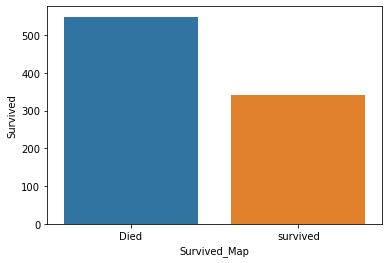

In [20]:
sns.barplot(x=survive_df.Survived_Map, y=survive_df.Survived);

In [21]:
train['Pclass_Map'] = train['Pclass'].map({1:'A', 2:'B', 3:'C'})

In [22]:
Class_df = train.groupby(['Survived_Map', 'Pclass_Map'], as_index=False)['Survived'].count()
Class_df

Survived_Map Pclass_Map  Survived
0         Died          A        80
1         Died          B        97
2         Died          C       372
3     survived          A       136
4     survived          B        87
5     survived          C       119

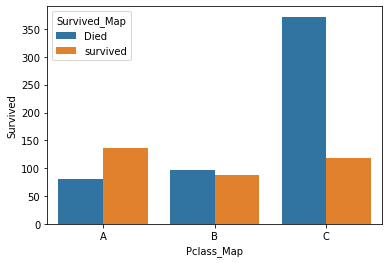

In [23]:
sns.barplot(x=Class_df.Pclass_Map, y=Class_df.Survived, hue=Class_df.Survived_Map);

In [24]:
name_df = train.groupby(['Title', 'Survived_Map'], as_index=False)['Survived'].count()
# name_df

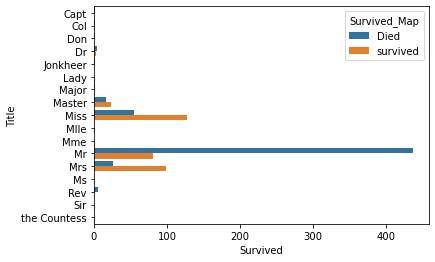

In [25]:
sns.barplot(x=name_df.Survived, y=name_df.Title, hue=name_df.Survived_Map);

In [26]:
sex_df = train.groupby(['Sex', 'Survived_Map'], as_index=False)['Survived'].count()

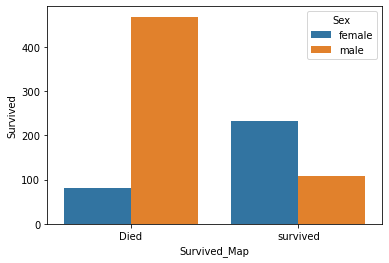

In [27]:
sns.barplot(x=sex_df.Survived_Map, y=sex_df.Survived, hue=sex_df.Sex);

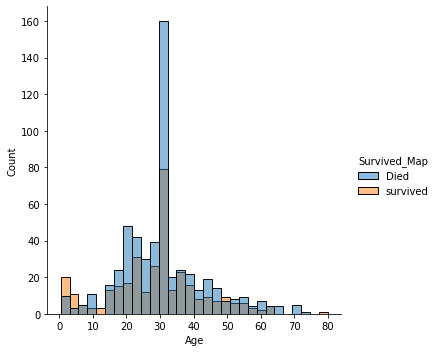

In [28]:
sns.displot(x=train.Age, hue=train.Survived_Map);

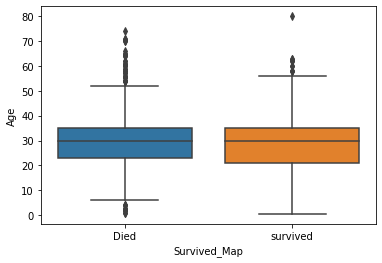

In [29]:
sns.boxplot(x=train.Survived_Map,y=train.Age);

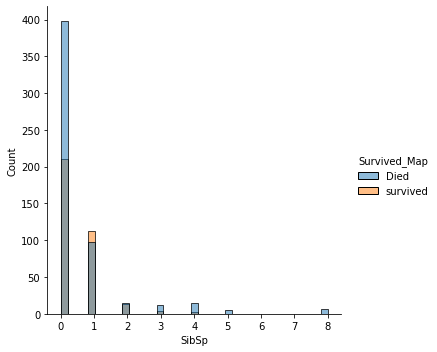

In [30]:
sns.displot(x=train.SibSp, hue=train.Survived_Map);

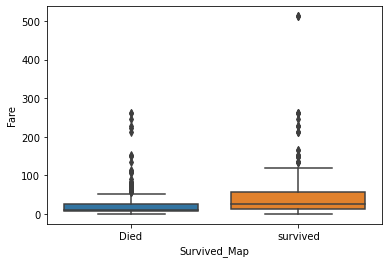

In [31]:
sns.boxplot(x=train.Survived_Map,y=train.Fare);

In [32]:
embarked_df = train.groupby(['Embarked', 'Survived_Map'], as_index=False)['Survived'].count()
embarked_df

Embarked Survived_Map  Survived
0        C         Died        75
1        C     survived        93
2        Q         Died        47
3        Q     survived        30
4        S         Died       427
5        S     survived       219

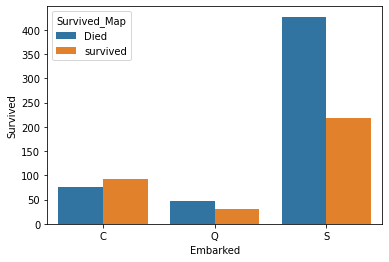

In [33]:
sns.barplot(x=embarked_df.Embarked, y=embarked_df.Survived, hue=embarked_df.Survived_Map);

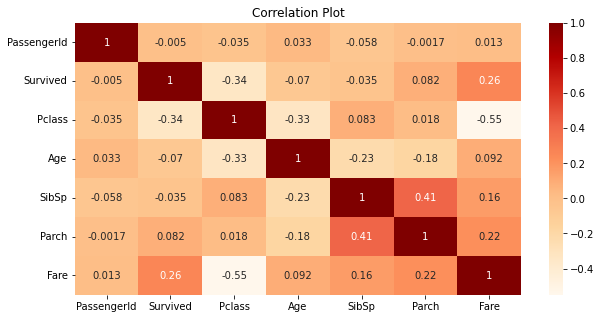

In [34]:
plt.figure(figsize=(10,5))
corr = train.corr()
sns.heatmap(corr, annot=True, cmap='OrRd')
plt.title('Correlation Plot');

In [35]:
train1 = train.copy()
test1 = test.copy()
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Title        418 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


In [36]:
train1.drop(columns=['PassengerId', 'Survived', 'Survived_Map', 'Pclass_Map', 'Name'],inplace=True)
test1.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

display(train1.head())
display(test1.head())

Pclass     Sex   Age  SibSp  Parch     Fare Embarked Title
0       3    male  22.0      1      0   7.2500        S    Mr
1       1  female  38.0      1      0  71.2833        C   Mrs
2       3  female  26.0      0      0   7.9250        S  Miss
3       1  female  35.0      1      0  53.1000        S   Mrs
4       3    male  35.0      0      0   8.0500        S    Mr

Pclass     Sex   Age  SibSp  Parch     Fare Embarked Title
0       3    male  34.5      0      0   7.8292        Q    Mr
1       3  female  47.0      1      0   7.0000        S   Mrs
2       2    male  62.0      0      0   9.6875        Q    Mr
3       3    male  27.0      0      0   8.6625        S    Mr
4       3  female  22.0      1      1  12.2875        S   Mrs

In [37]:
data = pd.concat([train1, test1], axis=0, ignore_index=True)
data[['Pclass', 'Title', 'Sex', 'SibSp', 'Embarked']] = data[['Pclass', 'Title', 'Sex', 'SibSp', 'Embarked']].astype(object)
data=pd.get_dummies(data)
data.head()

Age  Parch     Fare  Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  \
0  22.0      0   7.2500         0         0         1           0         1   
1  38.0      0  71.2833         1         0         0           1         0   
2  26.0      0   7.9250         0         0         1           1         0   
3  35.0      0  53.1000         1         0         0           1         0   
4  35.0      0   8.0500         0         0         1           0         1   

   SibSp_0  SibSp_1  ...  Title_Master  Title_Miss  Title_Mlle  Title_Mme  \
0        0        1  ...             0           0           0          0   
1        0        1  ...             0           0           0          0   
2        1        0  ...             0           1           0          0   
3        0        1  ...             0           0           0          0   
4        1        0  ...             0           0           0          0   

   Title_Mr  Title_Mrs  Title_Ms  Title_Rev  Title_Sir  Title_the Countess  
0         1          0         0          0          0                   0  
1         0          1         0          0          0                   0  
2         0          0         0          0          0                   0  
3         0          1         0          0          0                   0  
4         1          0         0          0          0                   0  

[5 rows x 36 columns]

In [38]:
TRAIN = data.iloc[:train1.shape[0],]
TEST = data.iloc[train1.shape[0]:,]
display(TRAIN.head())
display(TEST.head())

Age  Parch     Fare  Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  \
0  22.0      0   7.2500         0         0         1           0         1   
1  38.0      0  71.2833         1         0         0           1         0   
2  26.0      0   7.9250         0         0         1           1         0   
3  35.0      0  53.1000         1         0         0           1         0   
4  35.0      0   8.0500         0         0         1           0         1   

   SibSp_0  SibSp_1  ...  Title_Master  Title_Miss  Title_Mlle  Title_Mme  \
0        0        1  ...             0           0           0          0   
1        0        1  ...             0           0           0          0   
2        1        0  ...             0           1           0          0   
3        0        1  ...             0           0           0          0   
4        1        0  ...             0           0           0          0   

   Title_Mr  Title_Mrs  Title_Ms  Title_Rev  Title_Sir  Title_the Countess  
0         1          0         0          0          0                   0  
1         0          1         0          0          0                   0  
2         0          0         0          0          0                   0  
3         0          1         0          0          0                   0  
4         1          0         0          0          0                   0  

[5 rows x 36 columns]

Age  Parch     Fare  Pclass_1  Pclass_2  Pclass_3  Sex_female  Sex_male  \
891  34.5      0   7.8292         0         0         1           0         1   
892  47.0      0   7.0000         0         0         1           1         0   
893  62.0      0   9.6875         0         1         0           0         1   
894  27.0      0   8.6625         0         0         1           0         1   
895  22.0      1  12.2875         0         0         1           1         0   

     SibSp_0  SibSp_1  ...  Title_Master  Title_Miss  Title_Mlle  Title_Mme  \
891        1        0  ...             0           0           0          0   
892        0        1  ...             0           0           0          0   
893        1        0  ...             0           0           0          0   
894        1        0  ...             0           0           0          0   
895        0        1  ...             0           0           0          0   

     Title_Mr  Title_Mrs  Title_Ms  Title_Rev  Title_Sir  Title_the Countess  
891         1          0         0          0          0                   0  
892         0          1         0          0          0                   0  
893         1          0         0          0          0                   0  
894         1          0         0          0          0                   0  
895         0          1         0          0          0                   0  

[5 rows x 36 columns]

In [39]:
TRAIN.Age = (TRAIN.Age - TRAIN.Age.mean())/TRAIN.Age.std()
TRAIN.Fare = (TRAIN.Fare - TRAIN.Fare.mean())/TRAIN.Fare.std()

TEST.Age = (TEST.Age - TEST.Age.mean())/TEST.Age.std()
TEST.Fare = (TEST.Fare - TEST.Fare.mean())/TEST.Fare.std()

In [40]:
from sklearn.model_selection import train_test_split
X = TRAIN.copy()
y = train.Survived

In [41]:
xtrain, xval, ytrain, yval = train_test_split(X, y, random_state=100, shuffle=True, test_size=0.2)

In [42]:
xtrain.shape, xval.shape, ytrain.shape, yval.shape

((712, 36), (179, 36), (712,), (179,))

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

LogisticRegression()

In [45]:
lr.predict(TEST)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,